# K-pop Idols

* **Data:** `kpop_idols.csv`
* **Description:** K-pop is Korean pop music. It's popular the world over, especially when their fans take over Twitter hashtags. Idols are the individual musicians. Note that this dataset is not necessarily current k-pop idols, but includes people from the past, too (for example: group memberships might not be current).
* **Source:** https://www.kaggle.com/kimjihoo/kpopdb
* **Columns of interest:**
    * These are pretty self-explanatory. Just know "Birthplace" is the city they were born in, while "Country" is the country.

## Read in your data

In [1]:
import pandas as pd
df = pd.read_csv("kpop_idols.csv")
df

/Users/tanazmeghjani/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F
...,...,...,...,...,...,...,...,...,...,...
1305,Ziu,Park Heejun,박희준,지우,1997-06-16,VAV,South Korea,NaN,NaN,M
1306,ZN,Bae Jinye,배진예,지엔,1994-06-09,LABOUM,South Korea,Bucheon,UNI.T,F
1307,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,NaN,F
1308,Zuho,Bae Juho,백주호,주호,1996-07-04,SF9,South Korea,NaN,NaN,M


## What is the percentage of male vs female kpop idols?

In [2]:
df.Gender.value_counts()/1310*100

M    51.603053
F    48.396947
Name: Gender, dtype: float64

## Not all idols are born in South Korea: make a horizontal bar plot of the top five countries they're from, with the longest bar at the top.

<AxesSubplot:>

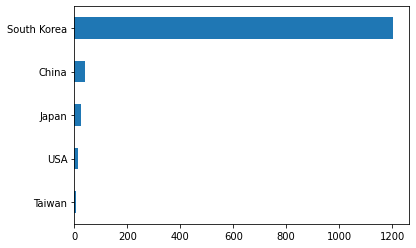

In [3]:
df.Country.value_counts(ascending=True).tail().plot(kind='barh')

## For **only** the idols born in China, what are the top 3 cities they were born in?

In [4]:
df[df.Country == 'China'].Birthplace.value_counts().head(3)

Shanghai    3
Wuhan       2
Qingdao     2
Name: Birthplace, dtype: int64

## What group has the most members in our dataset?

In [5]:
df.Group.value_counts().head()

NCT             18
14U             14
Cosmic Girls    13
Seventeen       13
The Boyz        12
Name: Group, dtype: int64

## Save a CSV file of just the members of Cosmic Girls, calling it `cosmic-girls.csv`.

Count just the `Group` column.

In [6]:
df[df.Group == 'Cosmic Girls'].to_csv('cosmic_girls.csv', index=False)

In [7]:
df.columns
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Stage_Name', 'Full_Name', 'Korean_Name', 'K._Stage_Name',
       'Date_of_Birth', 'Group', 'Country', 'Birthplace', 'Other_Group',
       'Gender'],
      dtype='object')

## How many idols are members of `Super Junior-M`?

Count both `Group` and `Other Group`.

In [8]:
df[df.Group == 'Super Junior-M']

,Stage_Name,Full_Name,Korean_Name,K._Stage_Name,Date_of_Birth,Group,Country,Birthplace,Other_Group,Gender
335,Henry,Henry Lau,헨리 라우,헨리,1989-10-11,Super Junior-M,Canada,Toronto,NaN,M
1303,Zhou Mi,Zhou Mi,조미,조미,1986-04-19,Super Junior-M,China,Wuhan,NaN,M


In [9]:
df[df.Other_Group == 'Super Junior-M']

,Stage_Name,Full_Name,Korean_Name,K._Stage_Name,Date_of_Birth,Group,Country,Birthplace,Other_Group,Gender
179,Donghae,Lee Donghae,이동해,동해,1986-10-15,Super Junior,South Korea,Mokpo,Super Junior-M,M
221,Eunhyuk,Lee Hyukjae,이혁재,은혁,1986-04-04,Super Junior,South Korea,Ilsan,Super Junior-M,M
676,Kyuhyun,Cho Kyuhyun,조규현,규현,1988-02-03,Super Junior,South Korea,Seoul,Super Junior-M,M
876,Ryeowook,Kim Ryeowook,김려욱,려욱,1987-06-21,Super Junior,South Korea,Incheon,Super Junior-M,M
979,Siwon,Choi Siwon,최시원,시원,1986-04-07,Super Junior,South Korea,Seoul,Super Junior-M,M
1046,Sungmin,Lee Sungmin,이성민,성민,1986-01-01,Super Junior,South Korea,Gyeonggi,Super Junior-M,M


## Create a new column called `age` that is the age of the idol.

There are a few ways you can do this, but when calculating the age **just use the year**, you don't need to worry if they've had a birthday or not in 2021. For example, A.M. was born in 1996, so we would say she is **2021 - 1996 = 25 years old**.

In [10]:
df.Date_of_Birth = pd.to_datetime(df.Date_of_Birth, errors='coerce', format= "%Y-%m-%d")

In [11]:
df['year'] = df.Date_of_Birth.dt.year

In [12]:
df['age'] = 2021- df.year

In [13]:
df

,Stage_Name,Full_Name,Korean_Name,K._Stage_Name,Date_of_Birth,Group,Country,Birthplace,Other_Group,Gender,year,age
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M,1996,25
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M,1992,29
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F,1999,22
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F,1999,22
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F,2001,20
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Ziu,Park Heejun,박희준,지우,1997-06-16,VAV,South Korea,NaN,NaN,M,1997,24
1306,ZN,Bae Jinye,배진예,지엔,1994-06-09,LABOUM,South Korea,Bucheon,UNI.T,F,1994,27
1307,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,NaN,F,2005,16
1308,Zuho,Bae Juho,백주호,주호,1996-07-04,SF9,South Korea,NaN,NaN,M,1996,25


## Who are the four youngest idols in our dataset?

In [14]:
df.age.sort_values()

142     16
1307    16
1213    16
332     16
1000    17
        ..
789     40
822     40
480     40
624     41
844     44
Name: age, Length: 1310, dtype: int64

In [15]:
df[df.age == 16]

,Stage_Name,Full_Name,Korean_Name,K._Stage_Name,Date_of_Birth,Group,Country,Birthplace,Other_Group,Gender,year,age
142,Dahyun,Jeong Dahyun,정다현,다현,2005-04-29,Rocket Punch,South Korea,NaN,NaN,F,2005,16
332,Heesun,Park Heesun,박희선,희선,2005-01-25,Pink Fantasy,South Korea,NaN,NaN,F,2005,16
1213,Yeseo,Kang Yeseo,강예서,예서,2005-08-22,Busters,South Korea,NaN,NaN,F,2005,16
1307,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,NaN,F,2005,16


## What is the median age of male vs female idols?

In [16]:
df.groupby(by = 'Gender').age.median()

Gender
F    25.0
M    26.0
Name: age, dtype: float64